In [1]:
!curl -O http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
!curl -O http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 9680k  100 9680k    0     0  22.7M      0 --:--:-- --:--:-- --:--:-- 22.7M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 28881  100 28881    0     0   163k      0 --:--:-- --:--:-- --:--:--  163k


In [2]:
!curl -O http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
!curl -O http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1610k  100 1610k    0     0  5367k      0 --:--:-- --:--:-- --:--:-- 5349k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4542  100  4542    0     0  41290      0 --:--:-- --:--:-- --:--:-- 40918


In [3]:
!gunzip t*-ubyte.gz

gzip: t10k-images-idx3-ubyte already exists; do you wish to overwrite (y or n)? y
gzip: t10k-labels-idx1-ubyte already exists; do you wish to overwrite (y or n)? y
gzip: train-images-idx3-ubyte already exists; do you wish to overwrite (y or n)? y
gzip: train-labels-idx1-ubyte already exists; do you wish to overwrite (y or n)? y


In [0]:
import numpy as np
import time
from mlxtend.data import loadlocal_mnist
X, y = loadlocal_mnist(
        images_path='/content/train-images-idx3-ubyte', 
        labels_path='/content/train-labels-idx1-ubyte',)

In [0]:
X_test, y_test = loadlocal_mnist(
        images_path='/content/t10k-images-idx3-ubyte', 
        labels_path='/content/t10k-labels-idx1-ubyte',)

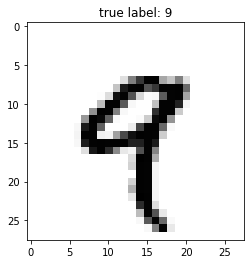

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot_digit(X, y, idx):
    img = X[idx].reshape(28,28)
    plt.imshow(img, cmap='Greys',  interpolation='nearest')
    plt.title('true label: %d' % y[idx])
    plt.show()
plot_digit(X, y, 4) 

In [0]:
X_train = np.asarray(X).astype(np.float32)
y_train = np.asarray(y).astype(np.float32)

In [0]:
X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [9]:
X = X_train / 255.0
X_T = X_test / 255.0
print('Dimensions: %s x %s' % (X.shape[0], X.shape[1]))
#print('\n1st row', X[0])


Dimensions: 60000 x 784


In [10]:
from numpy import array
from numpy import argmax
from keras.utils import to_categorical

# one hot encode
y = to_categorical(y_train, 10)
y_T = to_categorical(y_test, 10)

Using TensorFlow backend.


In [0]:
def sigmoid(x):
    return (1/(1 + np.exp(-x)))

In [0]:
def acc(length, train_image, w, y):
    y_hat = sigmoid(np.dot(train_image, w))
   
    y_hat = np.argmax(y_hat, axis=1) #predicted_y
    
    y = np.argmax(y, axis=1) #actual_y
     
    count = 0
    
    for i in range(length):
      if y_hat[i] == y[i]:
        count+=1
    return (count/len(y))*100

In [0]:
def  cal_cost(theta,X,y):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

In [0]:
def minibatch_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10,batch_size =20):
    
    m = len(y)
    n = len(X)
    cost_history = np.zeros(iterations)
    accArr = np.zeros(iterations)
    n_batches = int(m/batch_size)
    for it in range(iterations):
        cost =0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
           
            prediction = np.dot(X_i,theta)
            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)

        cost_history[it]  = cost        
        accuracy = acc(n, X, theta, y)
        print("iteration: {0} with accuracy: {1}".format(it, accuracy))
        accArr[it] = accuracy

    return theta, cost_history, accArr

In [15]:
lr = 0.1
n_iter = 100

theta = np.zeros((784, 10))


theta,cost_history,accArr = minibatch_gradient_descent(X,y,theta,lr,n_iter,100)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))
#print('Accuracy:', accuracy)

iteration: 0 with accuracy: 75.79
iteration: 1 with accuracy: 76.86
iteration: 2 with accuracy: 77.7
iteration: 3 with accuracy: 78.345
iteration: 4 with accuracy: 79.17833333333333
iteration: 5 with accuracy: 79.81666666666666
iteration: 6 with accuracy: 80.21833333333333
iteration: 7 with accuracy: 80.66666666666666
iteration: 8 with accuracy: 81.02666666666667
iteration: 9 with accuracy: 81.36
iteration: 10 with accuracy: 81.605
iteration: 11 with accuracy: 81.86166666666666
iteration: 12 with accuracy: 82.05833333333334
iteration: 13 with accuracy: 82.29833333333333
iteration: 14 with accuracy: 82.42833333333334
iteration: 15 with accuracy: 82.54833333333333
iteration: 16 with accuracy: 82.79166666666666
iteration: 17 with accuracy: 82.90333333333334
iteration: 18 with accuracy: 83.04333333333334
iteration: 19 with accuracy: 83.14833333333334
iteration: 20 with accuracy: 83.18333333333334
iteration: 21 with accuracy: 83.285
iteration: 22 with accuracy: 83.35166666666667
iteration: 

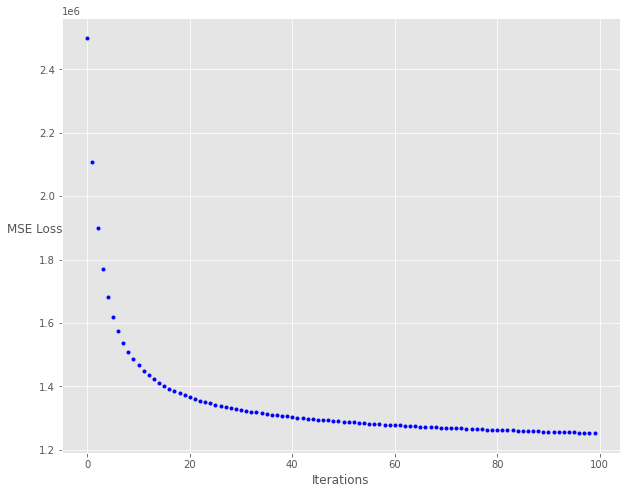

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['ggplot'])
fig,ax = plt.subplots(figsize=(10,8))
ax.set_ylabel('MSE Loss',rotation=0)
ax.set_xlabel('Iterations')
theta = np.zeros((784, 10))

_=ax.plot(range(n_iter),cost_history,'b.')


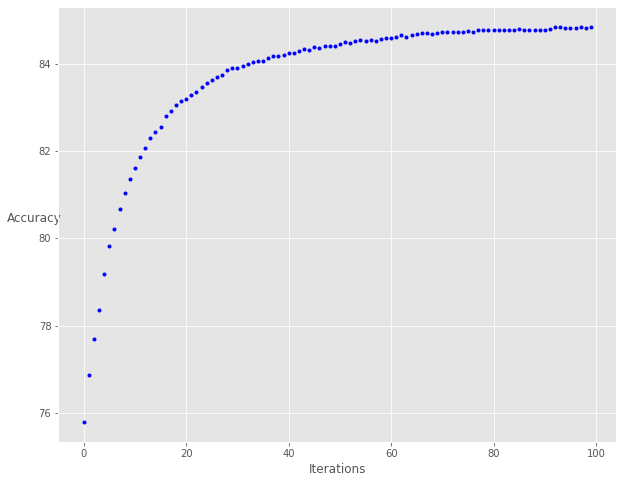

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['ggplot'])
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Accuracy',rotation=0)
ax.set_xlabel('Iterations')
theta = np.zeros((784, 10))

_=ax.plot(range(n_iter),accArr,'b.')

iteration: 0 with accuracy: 70.15166666666667
iteration: 1 with accuracy: 71.94666666666667
iteration: 2 with accuracy: 73.03500000000001
iteration: 3 with accuracy: 73.8
iteration: 4 with accuracy: 74.295
iteration: 5 with accuracy: 74.65833333333333
iteration: 6 with accuracy: 74.95166666666667
iteration: 7 with accuracy: 75.16000000000001
iteration: 8 with accuracy: 75.4
iteration: 9 with accuracy: 75.60333333333334
iteration: 10 with accuracy: 75.76
iteration: 11 with accuracy: 75.875
iteration: 12 with accuracy: 76.02666666666667
iteration: 13 with accuracy: 76.10666666666667
iteration: 14 with accuracy: 76.22
iteration: 15 with accuracy: 76.29666666666667
iteration: 16 with accuracy: 76.405
iteration: 17 with accuracy: 76.45666666666666
iteration: 18 with accuracy: 76.55666666666666
iteration: 19 with accuracy: 76.66
iteration: 20 with accuracy: 76.76833333333335
iteration: 21 with accuracy: 76.86666666666667
iteration: 22 with accuracy: 76.99000000000001
iteration: 23 with accur

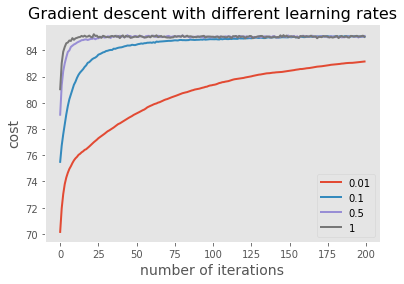

In [29]:
plt.figure()
num_iters = 200
learning_rates = [0.01,0.1,0.5, 1]
for lr in learning_rates:
    _,_, cost_history = minibatch_gradient_descent(X,y,theta,lr,num_iters,50)
    plt.plot(cost_history, linewidth=2)
plt.title("Gradient descent with different learning rates", fontsize=16)
plt.xlabel("number of iterations", fontsize=14)
plt.ylabel("cost", fontsize=14)
plt.legend(list(map(str, learning_rates)))
#plt.axis([0, num_iters, 0, 6])
plt.grid()
plt.show()

iteration: 0 with accuracy: 70.88
iteration: 1 with accuracy: 72.72
iteration: 2 with accuracy: 73.92
iteration: 3 with accuracy: 74.63
iteration: 4 with accuracy: 75.16000000000001
iteration: 5 with accuracy: 75.9
iteration: 6 with accuracy: 76.21
iteration: 7 with accuracy: 76.66
iteration: 8 with accuracy: 76.92999999999999
iteration: 9 with accuracy: 77.24
iteration: 10 with accuracy: 77.38000000000001
iteration: 11 with accuracy: 77.58
iteration: 12 with accuracy: 77.75999999999999
iteration: 13 with accuracy: 77.86999999999999
iteration: 14 with accuracy: 78.07
iteration: 15 with accuracy: 78.18
iteration: 16 with accuracy: 78.35
iteration: 17 with accuracy: 78.41
iteration: 18 with accuracy: 78.55
iteration: 19 with accuracy: 78.66
iteration: 0 with accuracy: 70.97
iteration: 1 with accuracy: 72.59
iteration: 2 with accuracy: 73.74000000000001
iteration: 3 with accuracy: 74.6
iteration: 4 with accuracy: 75.24
iteration: 5 with accuracy: 75.87
iteration: 6 with accuracy: 76.2
ite

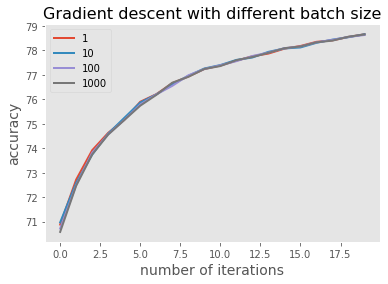

In [26]:
plt.figure()
num_iters = 20
batch_size = [1, 10, 100, 1000]
for B in batch_size:
    _,_, accArr = minibatch_gradient_descent(X_T,y_T,theta,0.01,num_iters,B)
    plt.plot(accArr, linewidth=2)
plt.title("Gradient descent with different batch size", fontsize=16)
plt.xlabel("number of iterations", fontsize=14)
plt.ylabel("accuracy", fontsize=14)
plt.legend(list(map(str, batch_size)))
#plt.axis([0, num_iters, 0, 100])
plt.grid()
plt.show()